In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 14

In [3]:
dataframe = pd.read_csv('amazon_alexa.tsv', sep = '\t')

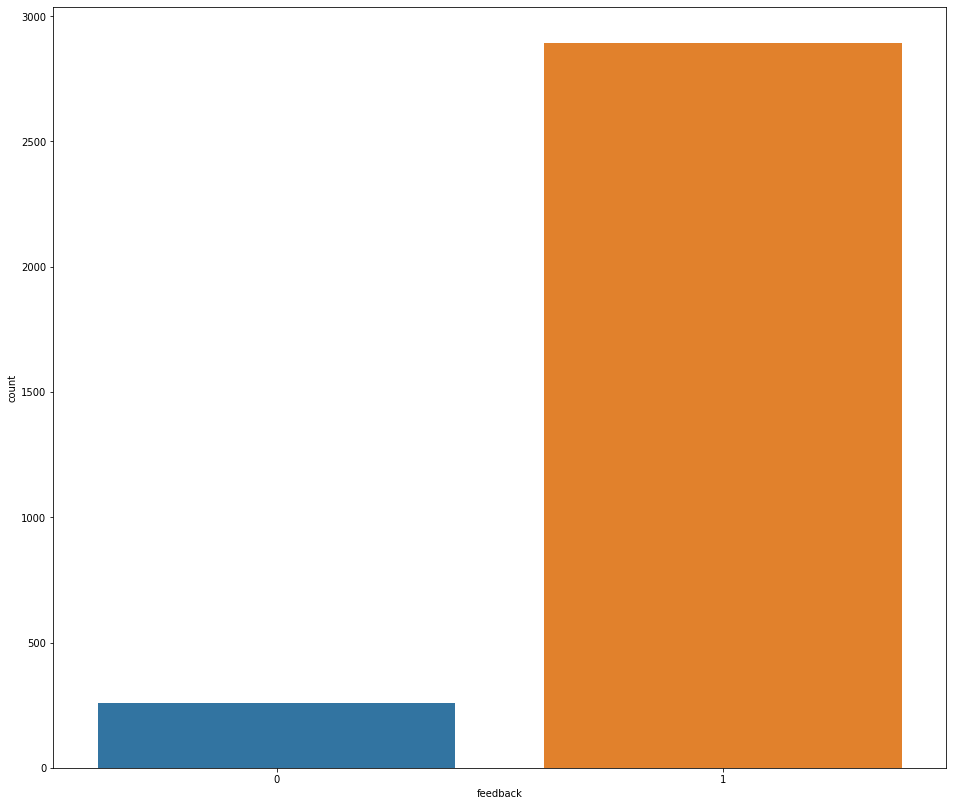

In [9]:
sns.countplot(dataframe['feedback'] )

In [5]:
print("Percentage of negative reviews: ", (len(dataframe[dataframe['feedback'] == 0]) * 100)/len(dataframe))
print("Percentage of Positive reviews: ", (len(dataframe[dataframe['feedback'] == 1]) * 100)/len(dataframe))

Percentage of negative reviews:  8.158730158730158
Percentage of Positive reviews:  91.84126984126983


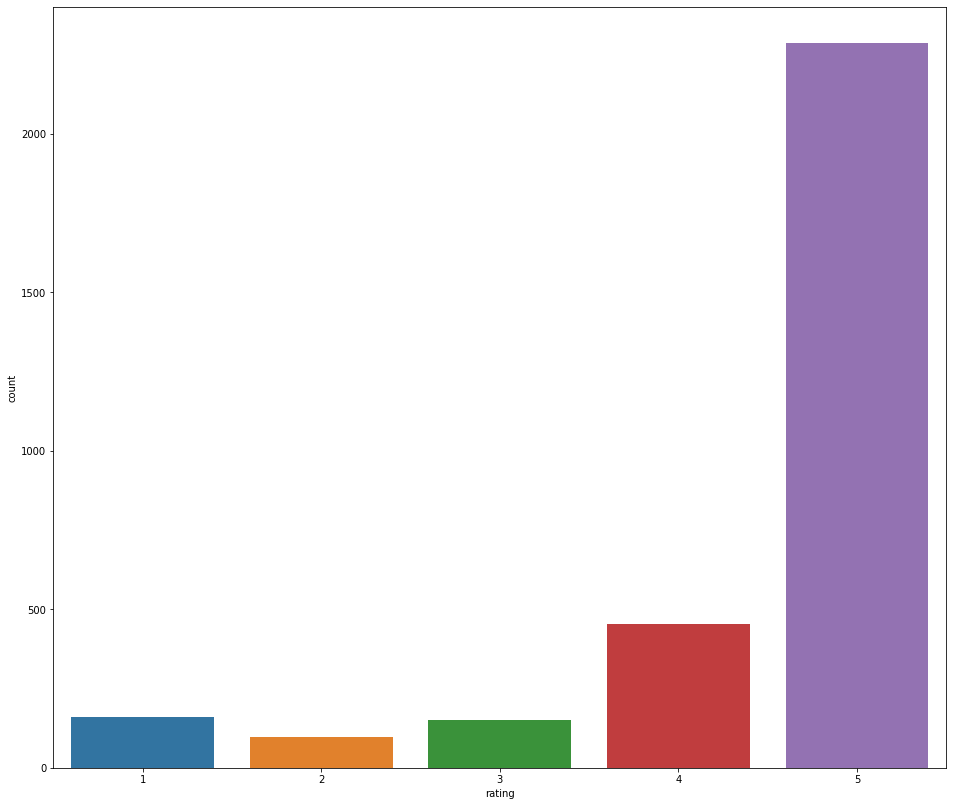

In [10]:
sns.countplot(dataframe['rating'])

[Text(0, 0, 'Black  Dot'),
 Text(0, 0, 'Charcoal Fabric '),
 Text(0, 0, 'Configuration: Fire TV Stick'),
 Text(0, 0, 'Black  Plus'),
 Text(0, 0, 'Black  Show'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Black  Spot'),
 Text(0, 0, 'White  Dot'),
 Text(0, 0, 'Heather Gray Fabric '),
 Text(0, 0, 'White  Spot'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Sandstone Fabric '),
 Text(0, 0, 'White  Show'),
 Text(0, 0, 'White  Plus'),
 Text(0, 0, 'Oak Finish '),
 Text(0, 0, 'Walnut Finish ')]

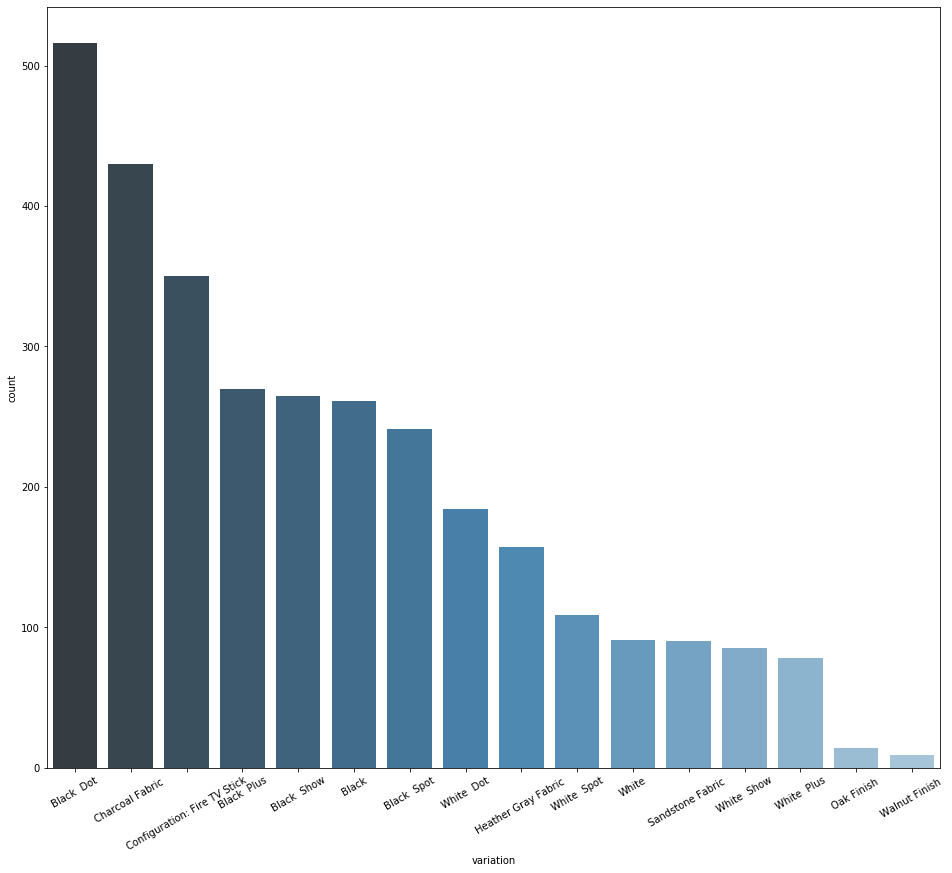

In [11]:
ax = sns.countplot(x = 'variation', data = dataframe,palette="Blues_d", order = dataframe['variation'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Charcoal Fabric '),
 Text(0, 0, 'Walnut Finish '),
 Text(0, 0, 'Heather Gray Fabric '),
 Text(0, 0, 'Sandstone Fabric '),
 Text(0, 0, 'Oak Finish '),
 Text(0, 0, 'Black'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Black  Spot'),
 Text(0, 0, 'White  Spot'),
 Text(0, 0, 'Black  Show'),
 Text(0, 0, 'White  Show'),
 Text(0, 0, 'Black  Plus'),
 Text(0, 0, 'White  Plus'),
 Text(0, 0, 'Configuration: Fire TV Stick'),
 Text(0, 0, 'Black  Dot'),
 Text(0, 0, 'White  Dot')]

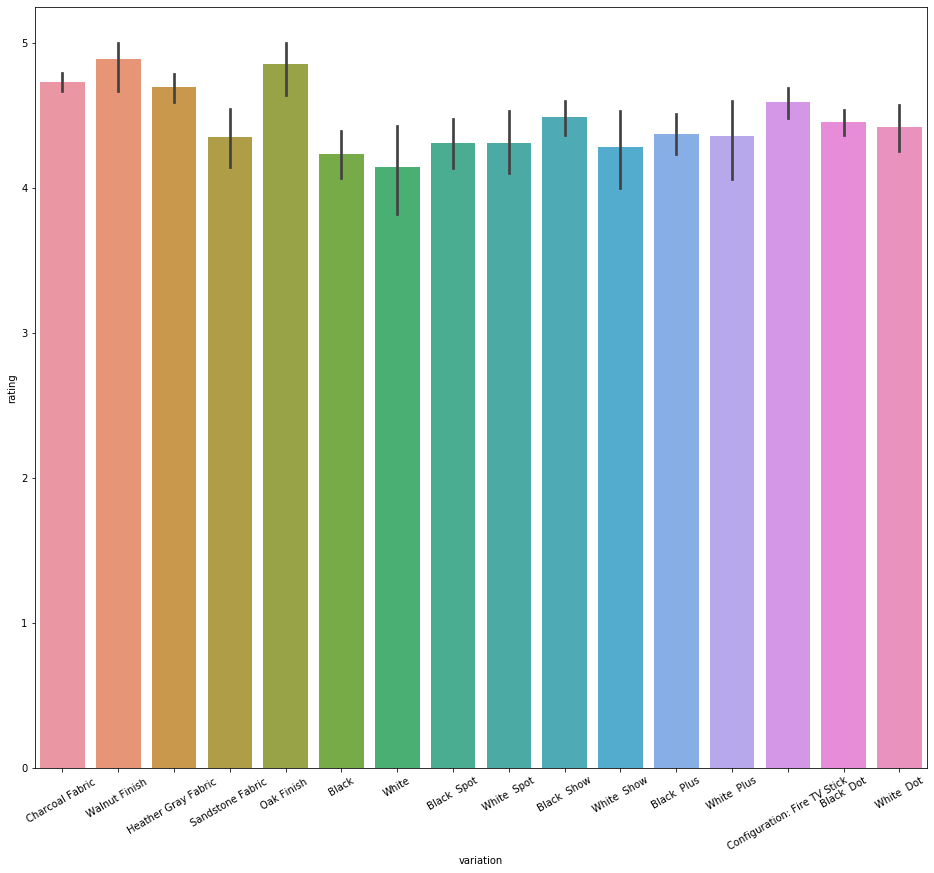

In [12]:
ax = sns.barplot(x = 'variation', y = 'rating', data = dataframe)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [13]:
dataframe.groupby('variation').mean().reset_index()

,variation,rating,feedback
0,Black,4.233716,0.865900
1,Black Dot,4.453488,0.930233
2,Black Plus,4.370370,0.896296
3,Black Show,4.490566,0.932075
4,Black Spot,4.311203,0.867220
5,Charcoal Fabric,4.730233,0.972093
6,Configuration: Fire TV Stick,4.591429,0.920000
7,Heather Gray Fabric,4.694268,0.987261
8,Oak Finish,4.857143,1.000000
9,Sandstone Fabric,4.355556,0.933333


In [14]:
def wordclouds(x, label):
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    text = []
    dataframe_pos = x['feedback'] == label
    for i in range(0, len(x)):
        review = dataframe['verified_reviews'][i]
        text.append(review)
    text = " ".join(text for text in text)

    stopwords = set(STOPWORDS)
    stopwords.remove('not')
    wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_font_size=100).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

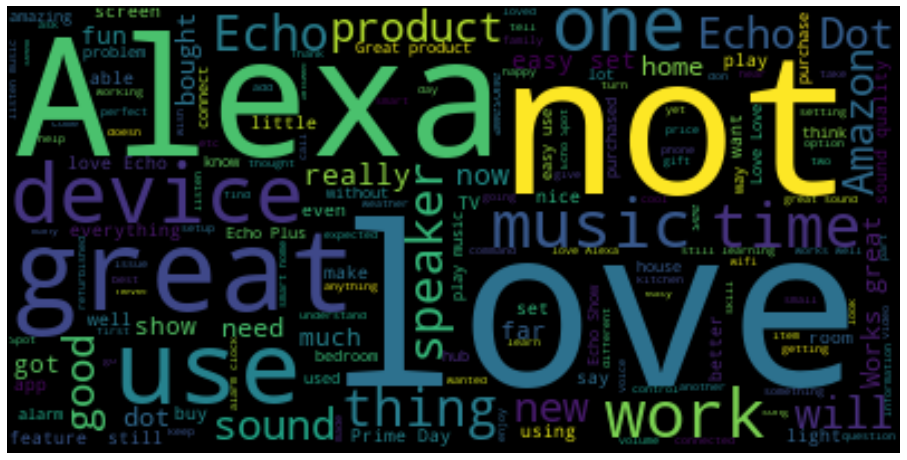

In [16]:
wordclouds(dataframe,1)

# try to classify and Analyze the bad reviews through out this dataset and lets see if we could soulve some problem.

In [25]:
dataframe = dataframe[dataframe.rating!=5]
dataframe = dataframe[dataframe.rating!=4]

In [26]:
dataframe.head()

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [27]:
dataframe.shape

(409, 5)

In [28]:
dataframe["index"] = range(0,409)
dataframe = dataframe.set_index("index")
dataframe.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
